# Compartmental Differences Analysis

In [1]:
# pandas: Helps us load, explore, and manipulate data tables
import pandas as pd

# seaborn: Makes it easy to create beautiful and informative plots
import seaborn as sns

# scipy: Provides statistical tools for analyzing data
from scipy import stats
import scipy

# matplotlib: Allows us to customize and display our plots
import matplotlib.pyplot as plt

# statannot: Adds statistical annotations (like p-values) to plots
from statannot import add_stat_annotation

# Optional: Configure pandas to display more rows and columns (so we can see more of the dataset at once)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Optional: Set a nice default style for plots
sns.set(style="whitegrid")

# Confirm to students that everything is ready
print("All libraries are imported, and we're ready to go!")


All libraries are imported, and we're ready to go!


## Data

In [11]:
# Load the dataset for the H2170 lung cancer cell line
# We call its container "df_cell", which stands for dataFrame of the cell line that holds all of the single-cell protein measurements
df_cell = pd.read_csv("/Users/justi/DATA_481_766_protein_networks-1/protein_networks/data/lung_cancer.csv", index_col=0)

# Display the first few rows to ensure it loaded correctly
print("Dataset loaded successfully! Here are the first few rows:")
df_cell.head()

Dataset loaded successfully! Here are the first few rows:


01_cMyc_nuc_mean  01_BRD4_nuc_mean  01_CDK2_nuc_mean  \
index_column                                                         
cell_24              -0.274626         -0.632049          0.130158   
cell_31               0.545061          0.302935          0.875525   
cell_36               0.478836         -0.622209         -0.316807   
cell_43              -0.747665         -1.171727         -0.779043   
cell_51              -0.969321         -0.830915         -0.439126   

              02_HER2_nuc_mean  02_CyclinD1_nuc_mean  02_EGFR_nuc_mean  \
index_column                                                             
cell_24               0.996370             -0.217049         -0.177764   
cell_31               0.416186             -0.523494         -0.444546   
cell_36               0.273643             -0.855136         -0.445459   
cell_43              -0.258488             -1.004050         -0.582779   
cell_51               0.909262             -0.538657          1.243933   

              03_FGFR2_nuc_mean  03_CDC6_nuc_mean  03_EZH2_nuc_mean  \
index_column                                                          
cell_24                0.109605          1.356144          0.482767   
cell_31               -0.218084          0.560125          0.388460   
cell_36               -0.495221          0.306739         -0.401794   
cell_43               -0.864614         -0.471185         -0.527605   
cell_51               -0.292941         -0.317952          0.356104   

              04_cMycS62_nuc_mean  04_FOXO1_nuc_mean  04_HER2_nuc_mean  \
index_column                                                             
cell_24                 -0.536020          -0.987532         -0.897249   
cell_31                  0.624579          -0.696834         -0.698082   
cell_36                  0.390856          -0.824935         -0.611346   
cell_43                 -0.821571          -0.864645         -0.990543   
cell_51                 -1.060728          -0.793165          0.505676   

              05_cMycT58_nuc_mean  05_CyclinA_nuc_mean  05_CyclinB1_nuc_mean  \
index_column                                                                   
cell_24                  0.243860            -0.927233             -0.002703   
cell_31                  0.404130             0.377436              0.506497   
cell_36                 -0.104029            -0.369246             -0.081758   
cell_43                 -0.607014            -0.717098             -0.687771   
cell_51                 -0.859886            -0.976564             -0.010725   

              06_FOXO3A_nuc_mean  06_AKT_nuc_mean  06_ZEB1_nuc_mean  \
index_column                                                          
cell_24                 0.406510        -0.457381          0.887332   
cell_31                 0.032809        -0.538555          0.346244   
cell_36                 0.202629        -0.745466         -0.057875   
cell_43                 0.153157        -0.843331         -0.112361   
cell_51                -0.142979         0.121853          1.201399   

              07_pRb_S807811_nuc_mean  07_Rb_nuc_mean  07_p21_nuc_mean  \
index_column                                                             
cell_24                      0.114794       -0.430899         1.254235   
cell_31                      1.209497        0.987865         0.753873   
cell_36                      0.507749        0.167409         0.202370   
cell_43                      0.669902        0.363792        -0.009721   
cell_51                     -1.370445       -1.067327         0.643206   

              08_CDT1_nuc_mean  08_MDM2_nuc_mean  09_SKP2_nuc_mean  \
index_column                                                         
cell_24               1.871959          0.461608          0.422949   
cell_31              -0.235938         -0.070285          1.566281   
cell_36              -0.516313         -0.422799          1.228007   
cell_43              -0.684535         -0.385856          0

Predefined nuclear/cytoplasmic proteins. Adding HER2 to both for high and low classification.

In [32]:
all_nuc_or_cyt = ['01_cMyc_nuc_mean', '01_BRD4_nuc_mean', '01_CDK2_nuc_mean', '02_CyclinD1_nuc_mean', 
 '03_CDC6_nuc_mean', '03_EZH2_nuc_mean', '04_cMycS62_nuc_mean', '04_FOXO1_nuc_mean', 
 '05_cMycT58_nuc_mean', '05_CyclinA_nuc_mean', '05_CyclinB1_nuc_mean', '06_FOXO3A_nuc_mean', 
 '06_ZEB1_nuc_mean', '07_pRb_S807811_nuc_mean', '07_Rb_nuc_mean', '07_p21_nuc_mean', 
 '08_CDT1_nuc_mean', '08_MDM2_nuc_mean', '09_SKP2_nuc_mean', '10_TGFbeta_nuc_mean', 
 '10_E2F1_nuc_mean', '11_cFOS_nuc_mean', '12_EZH2_nuc_mean', '12_cPARP_nuc_mean', "02_HER2_nuc_mean"]

all_Cyt_or_nuc = ['01_CDK2_ring_mean', '02_EGFR_ring_mean', '03_FGFR2_ring_mean', 
 '06_FOXO3A_ring_mean', '06_AKT_ring_mean', '09_mTOR_ring_mean', 
 '11_CDH1_ring_mean', '12_cPARP_ring_mean', "02_HER2_ring_mean"]

In [34]:
data = df_cell
nuc_data = data[all_nuc_or_cyt]
cyt_data = data[all_Cyt_or_nuc]
nuc_data.head()

01_cMyc_nuc_mean  01_BRD4_nuc_mean  01_CDK2_nuc_mean  \
index_column                                                         
cell_24              -0.274626         -0.632049          0.130158   
cell_31               0.545061          0.302935          0.875525   
cell_36               0.478836         -0.622209         -0.316807   
cell_43              -0.747665         -1.171727         -0.779043   
cell_51              -0.969321         -0.830915         -0.439126   

              02_CyclinD1_nuc_mean  03_CDC6_nuc_mean  03_EZH2_nuc_mean  \
index_column                                                             
cell_24                  -0.217049          1.356144          0.482767   
cell_31                  -0.523494          0.560125          0.388460   
cell_36                  -0.855136          0.306739         -0.401794   
cell_43                  -1.004050         -0.471185         -0.527605   
cell_51                  -0.538657         -0.317952          0.356104   

              04_cMycS62_nuc_mean  04_FOXO1_nuc_mean  05_cMycT58_nuc_mean  \
index_column                                                                
cell_24                 -0.536020          -0.987532             0.243860   
cell_31                  0.624579          -0.696834             0.404130   
cell_36                  0.390856          -0.824935            -0.104029   
cell_43                 -0.821571          -0.864645            -0.607014   
cell_51                 -1.060728          -0.793165            -0.859886   

              05_CyclinA_nuc_mean  05_CyclinB1_nuc_mean  06_FOXO3A_nuc_mean  \
index_column                                                                  
cell_24                 -0.927233             -0.002703            0.406510   
cell_31                  0.377436              0.506497            0.032809   
cell_36                 -0.369246             -0.081758            0.202629   
cell_43                 -0.717098             -0.687771            0.153157   
cell_51                 -0.976564             -0.010725           -0.142979   

              06_ZEB1_nuc_mean  07_pRb_S807811_nuc_mean  07_Rb_nuc_mean  \
index_column                                                              
cell_24               0.887332                 0.114794       -0.430899   
cell_31               0.346244                 1.209497        0.987865   
cell_36              -0.057875                 0.507749        0.167409   
cell_43              -0.112361                 0.669902        0.363792   
cell_51               1.201399                -1.370445       -1.067327   

              07_p21_nuc_mean  08_CDT1_nuc_mean  08_MDM2_nuc_mean  \
index_column                                                        
cell_24              1.254235          1.871959          0.461608   
cell_31              0.753873         -0.235938         -0.070285   
cell_36              0.202370         -0.516313         -0.422799   
cell_43             -0.009721         -0.684535         -0.385856   
cell_51              0.643206         -0.438881          1.183240   

              09_SKP2_nuc_mean  10_TGFbeta_nuc_mean  10_E2F1_nuc_mean  \
index_column                                                            
cell_24               0.422949            -0.434054         -0.922134   
cell_31               1.566281            -0.004364         -0.017985   
cell_36               1.228007             0.007855         -0.462886   
cell_43               0.154523            -0.237356         -0.532523   
cell_51              -0.800889            -0.426352         -0.661457   

              11_cFOS_nuc_mean  12_EZH2_nuc_mean  12_cPARP_nuc_mean  \
index_column                                                          
cell_24               0.300361          0.626121           0.519019   
cell_31               0.250767          1.478013           0.019616   
cell_36              -0.072239          0.222873          -0.226078   
cell_43              -0.709584   

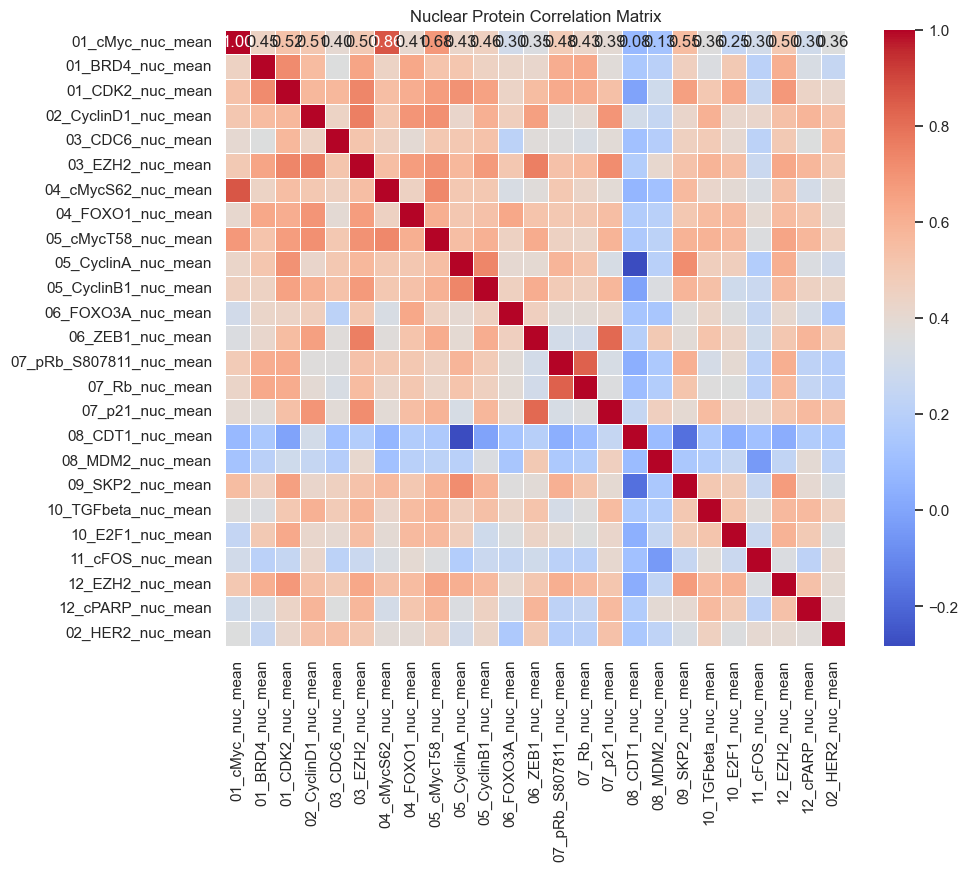

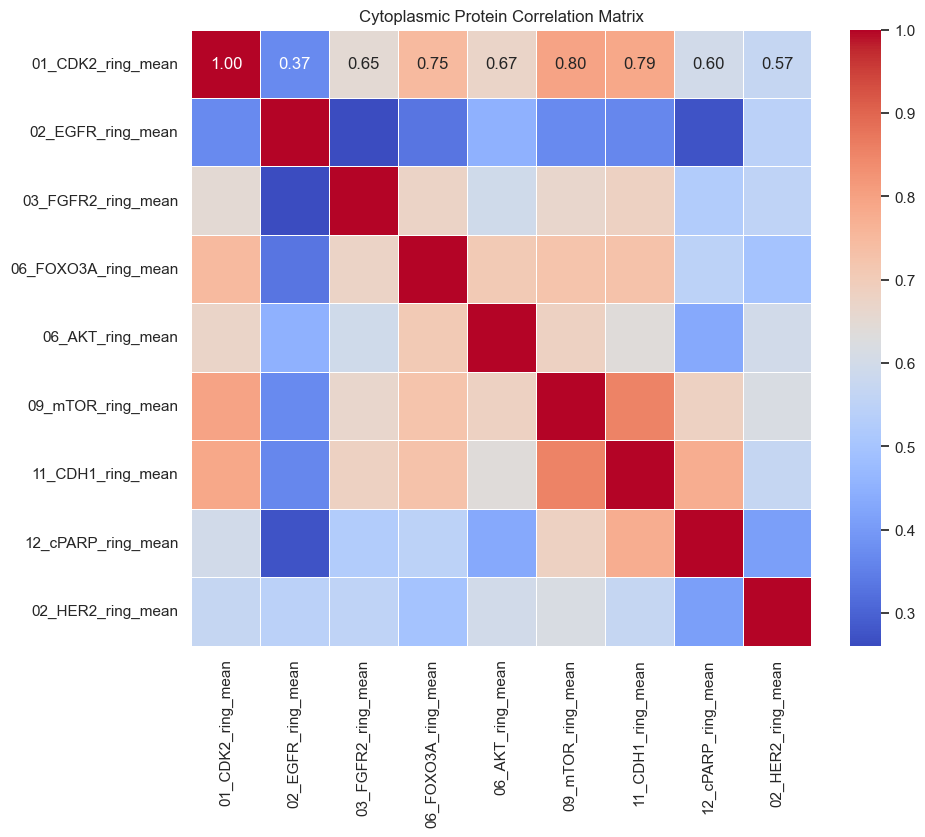

In [35]:
nuc_corr_matrix = nuc_data.corr(method="pearson")
cyt_corr_matrix = cyt_data.corr(method="pearson")

plt.figure(figsize=(10, 8))
sns.heatmap(nuc_corr_matrix, annot=True, cmap="coolwarm", fmt= ".2f", linewidths=0.5)
plt.title("Nuclear Protein Correlation Matrix")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(cyt_corr_matrix, annot=True, cmap="coolwarm", fmt= ".2f", linewidths=0.5)
plt.title("Cytoplasmic Protein Correlation Matrix")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

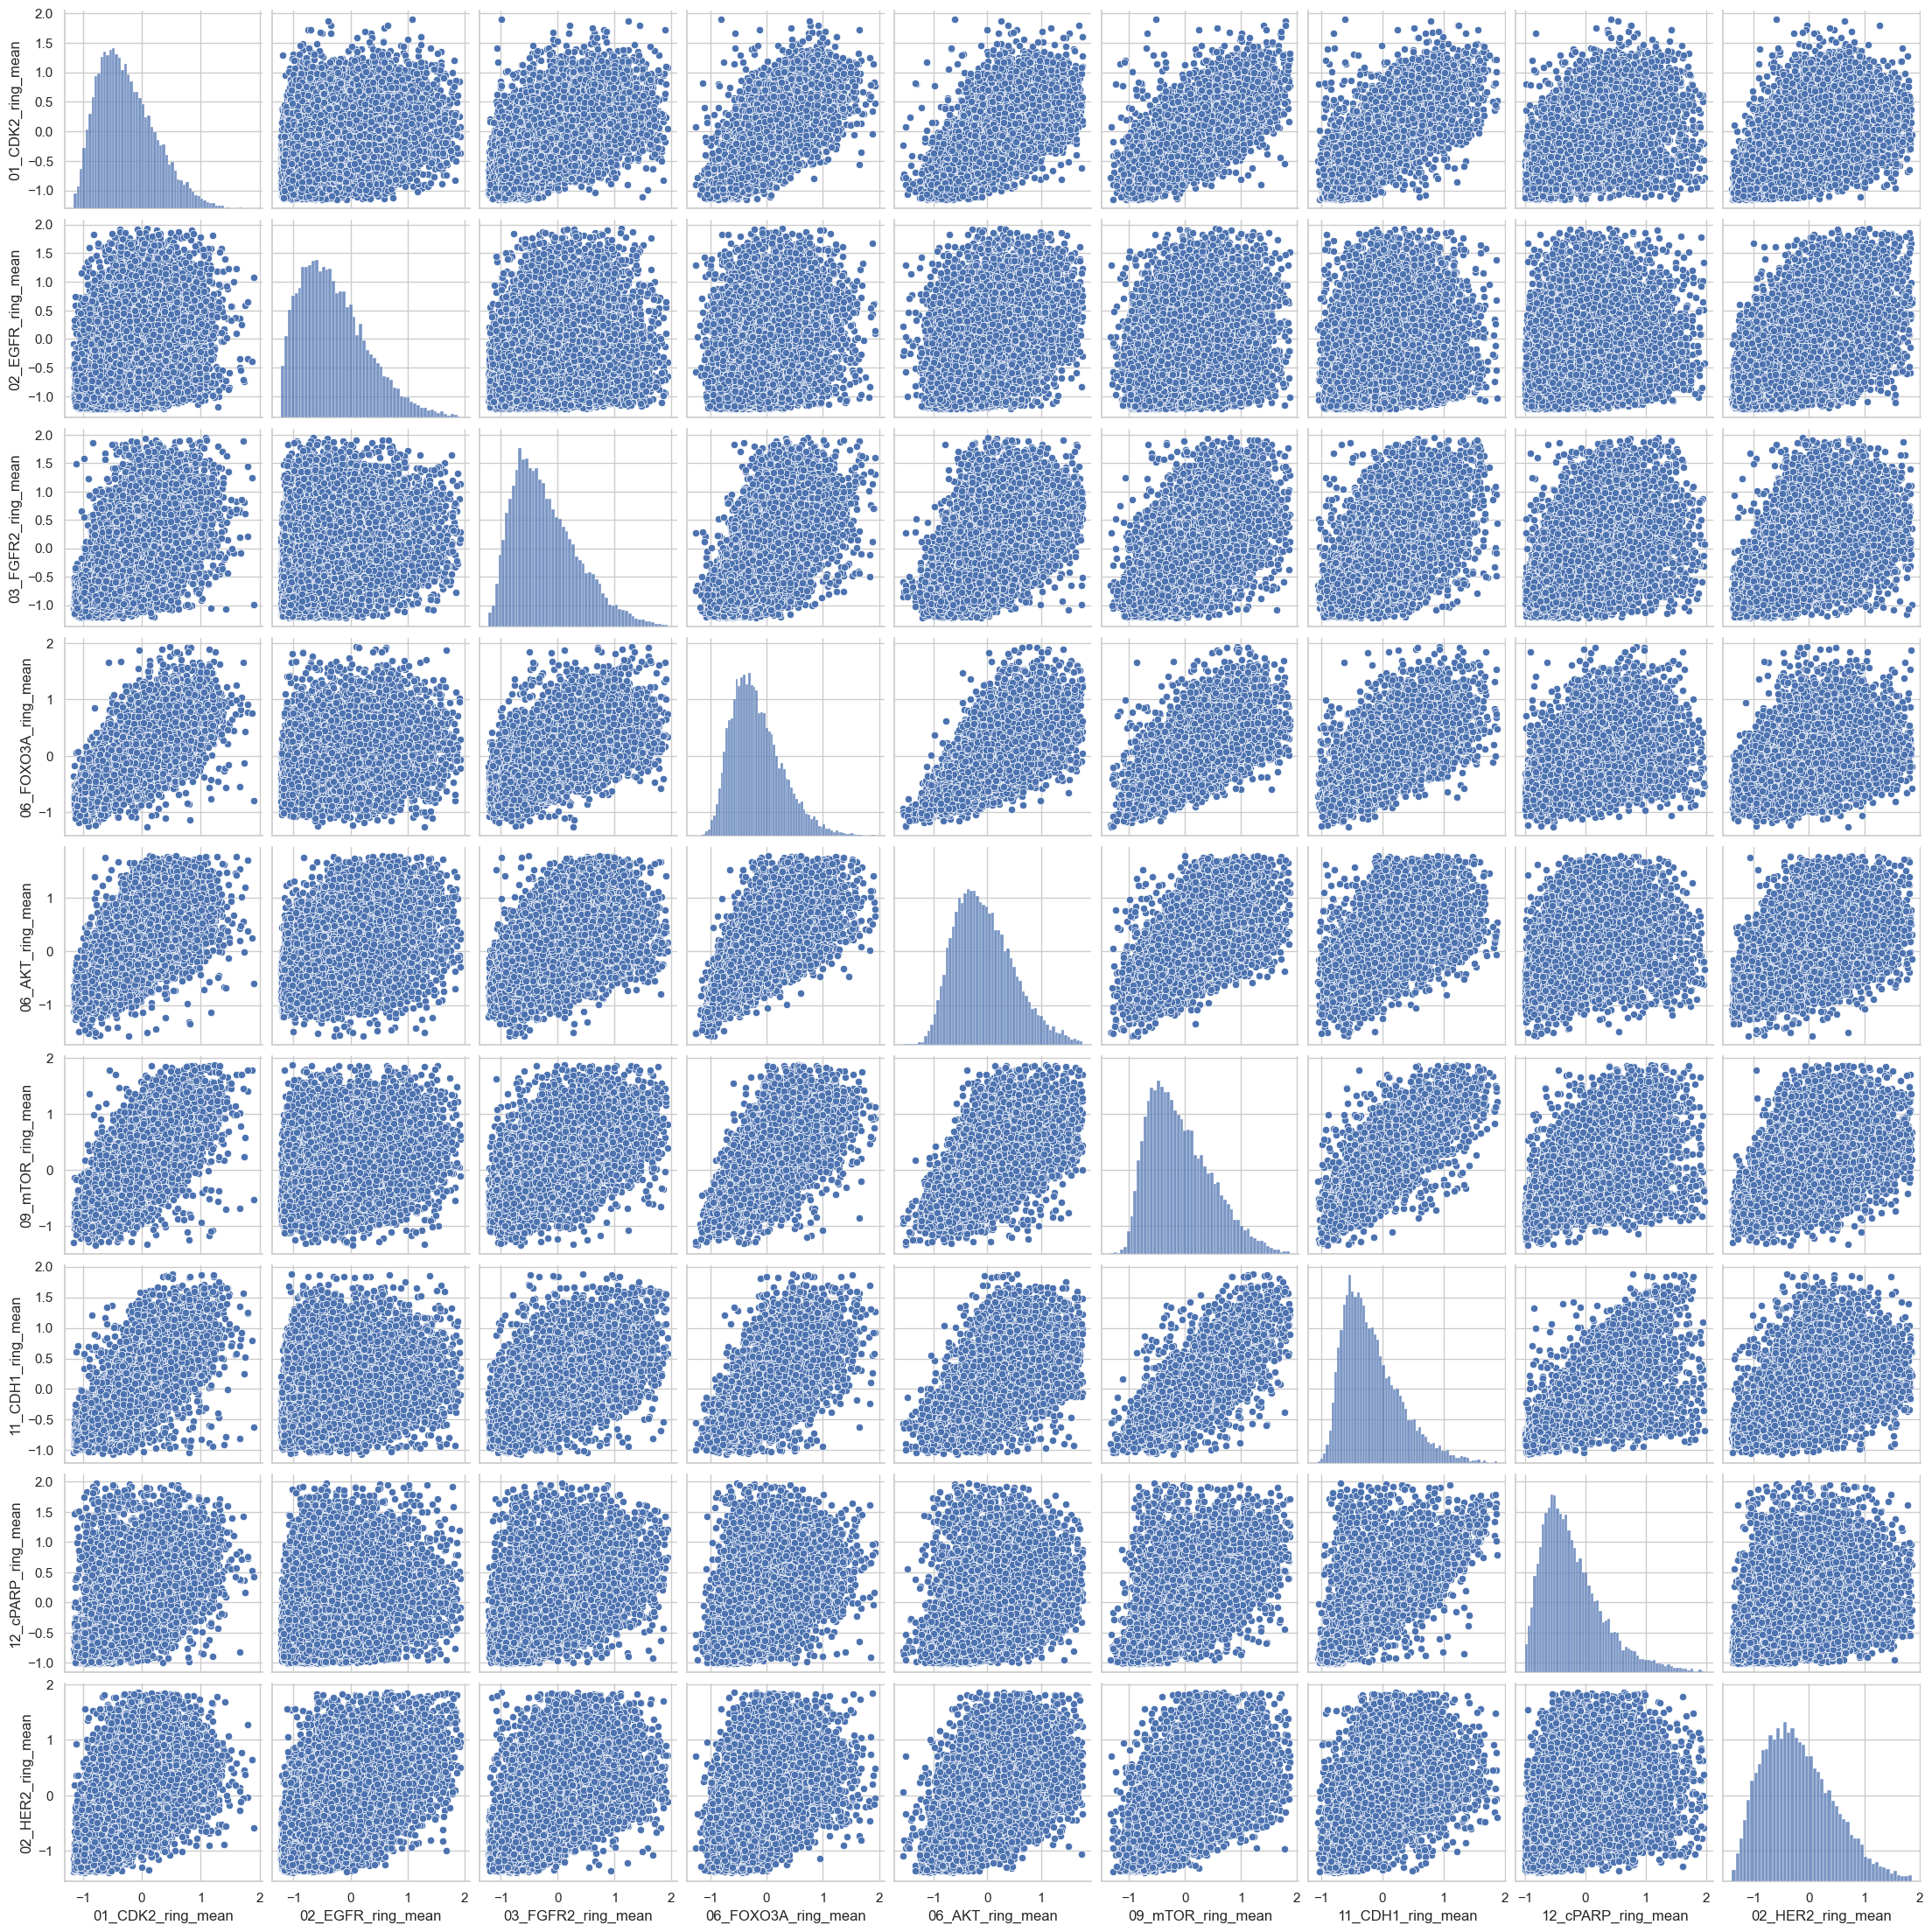

In [36]:
sns.pairplot(cyt_data)
plt.show()

Let's look at HER2 high and HER2 low:

In [37]:
# Dataset and HER2 condition column
nuc_data_2 = nuc_data
cond = '02_HER2_nuc_mean'  # Column representing HER2 combined expression

# Step 1: Identify the top and bottom 10% of HER2 expression
top_10_percent = nuc_data_2[cond].quantile(0.9)  # Value at the 90th percentile
bottom_10_percent = nuc_data_2[cond].quantile(0.1)  # Value at the 10th percentile

# Step 2: Add a new column to label the HER2 groups
nuc_data_2['HER2_Group'] = 'Middle'  # Default to 'Middle' group
nuc_data_2.loc[data[cond] >= top_10_percent, 'HER2_Group'] = 'High HER2'  # Top 10%
nuc_data_2.loc[data[cond] <= bottom_10_percent, 'HER2_Group'] = 'Low HER2'  # Bottom 10%

# Step 3: Verify the new column and data
print("Updated dataset with HER2 groups:")
print(nuc_data_2[['HER2_Group', cond]].head())  # Display the HER2 group and condition

Updated dataset with HER2 groups:
             HER2_Group  02_HER2_nuc_mean
index_column                             
cell_24       High HER2          0.996370
cell_31          Middle          0.416186
cell_36          Middle          0.273643
cell_43          Middle         -0.258488
cell_51       High HER2          0.909262


/var/folders/s7/d4v3110x611f7tfytvt1b2f40000gn/T/ipykernel_9120/2507742286.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuc_data_2['HER2_Group'] = 'Middle'  # Default to 'Middle' group


Now for cytoplasm:

In [38]:
# Dataset and HER2 condition column
cyt_data_2 = cyt_data
cond = '02_HER2_ring_mean'  # Column representing HER2 combined expression

# Step 1: Identify the top and bottom 10% of HER2 expression
top_10_percent = cyt_data_2[cond].quantile(0.9)  # Value at the 90th percentile
bottom_10_percent = cyt_data_2[cond].quantile(0.1)  # Value at the 10th percentile

# Step 2: Add a new column to label the HER2 groups
cyt_data_2['HER2_Group'] = 'Middle'  # Default to 'Middle' group
cyt_data_2.loc[data[cond] >= top_10_percent, 'HER2_Group'] = 'High HER2'  # Top 10%
cyt_data_2.loc[data[cond] <= bottom_10_percent, 'HER2_Group'] = 'Low HER2'  # Bottom 10%

# Step 3: Verify the new column and data
print("Updated dataset with HER2 groups:")
print(cyt_data_2[['HER2_Group', cond]].head())  # Display the HER2 group and condition

Updated dataset with HER2 groups:
             HER2_Group  02_HER2_ring_mean
index_column                              
cell_24       High HER2           1.319311
cell_31       High HER2           0.890622
cell_36          Middle           0.236957
cell_43          Middle          -0.554567
cell_51          Middle          -0.289053


/var/folders/s7/d4v3110x611f7tfytvt1b2f40000gn/T/ipykernel_9120/4161370254.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyt_data_2['HER2_Group'] = 'Middle'  # Default to 'Middle' group


In [43]:
nuc_high = nuc_data_2.loc[nuc_data_2["HER2_Group"] == "High HER2"].drop('HER2_Group',axis=1)
nuc_low = nuc_data_2.loc[nuc_data_2["HER2_Group"] == "Low HER2"].drop('HER2_Group',axis=1)

cyt_high = cyt_data_2.loc[cyt_data_2["HER2_Group"] == "High HER2"].drop('HER2_Group',axis=1)
cyt_low = cyt_data_2.loc[cyt_data_2["HER2_Group"] == "Low HER2"].drop('HER2_Group',axis=1)



Nuclear high vs Nuclear low

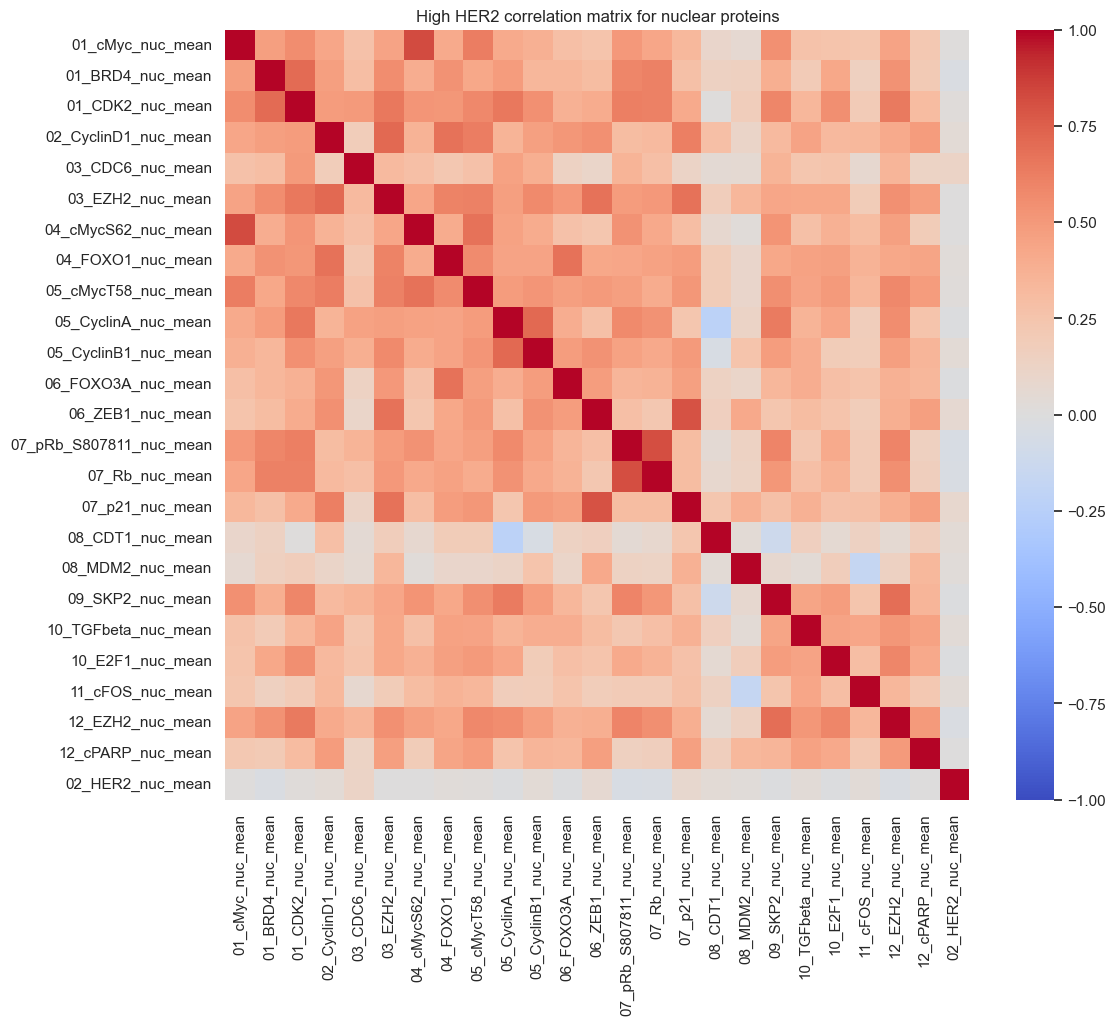

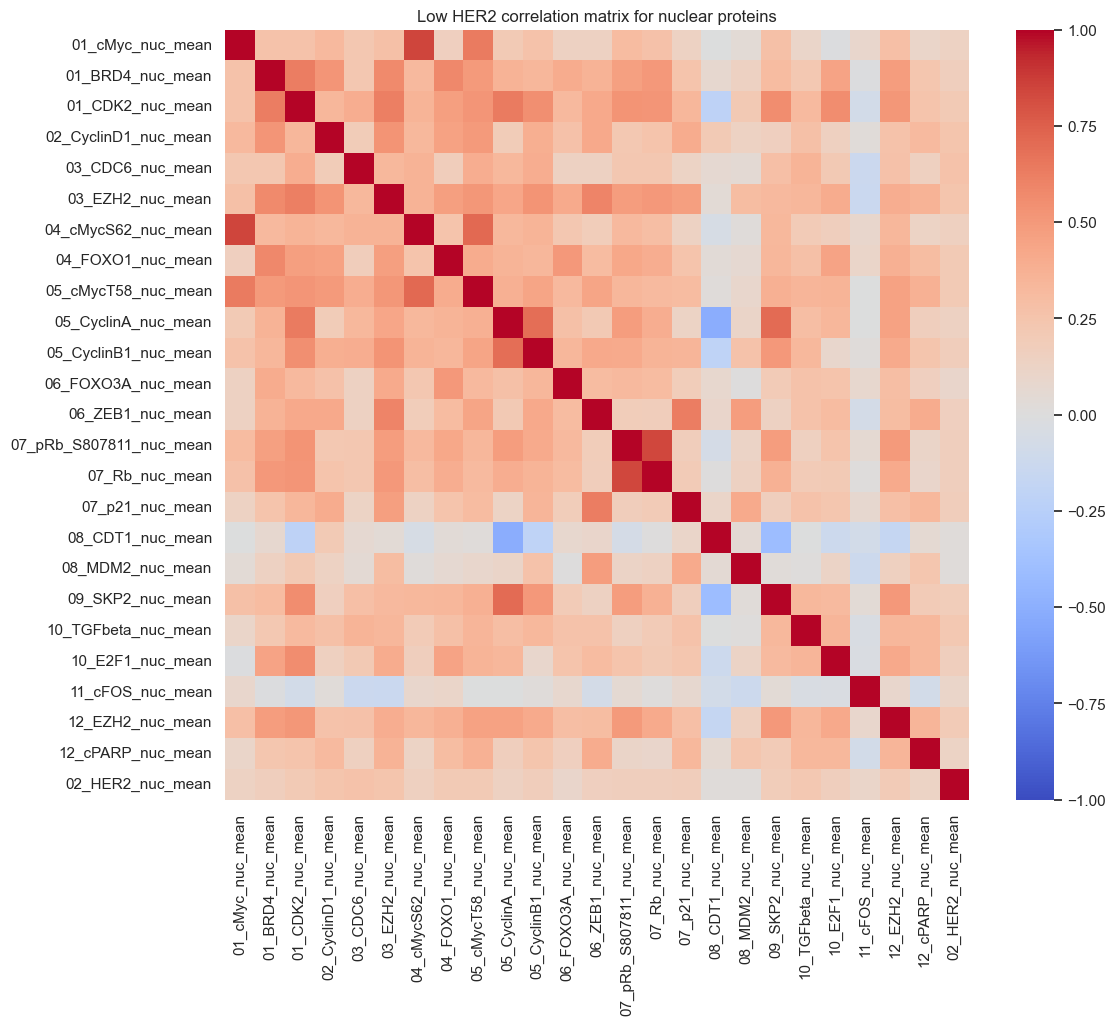

In [53]:
nuc_high_corr = nuc_high.corr(method= "pearson")

plt.figure(figsize=(12,10))
sns.heatmap(nuc_high_corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("High HER2 correlation matrix for nuclear proteins")
plt.show()

nuc_low_corr = nuc_low.corr(method="pearson")
plt.figure(figsize=(12,10))
sns.heatmap(nuc_low_corr, cmap="coolwarm",vmin=-1, vmax=1)
plt.title("Low HER2 correlation matrix for nuclear proteins")

plt.show()

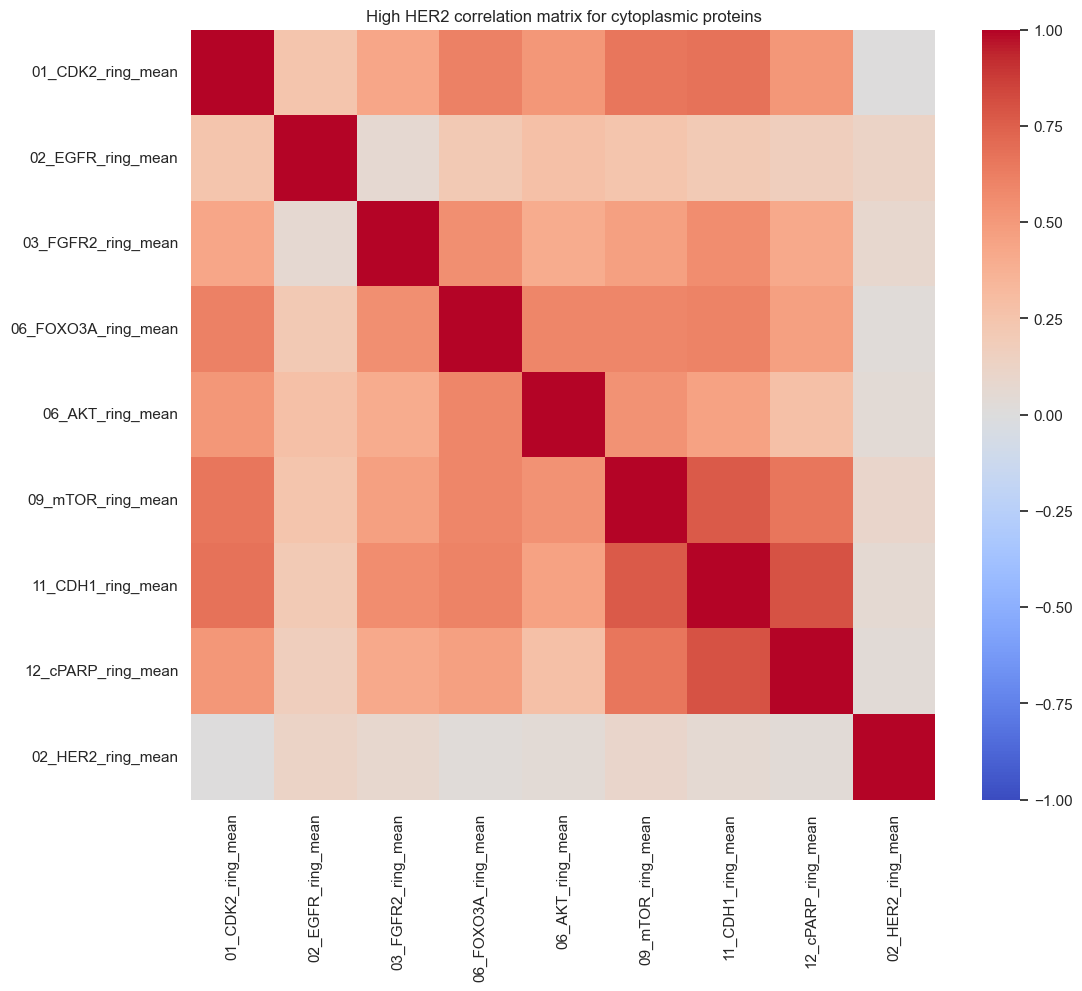

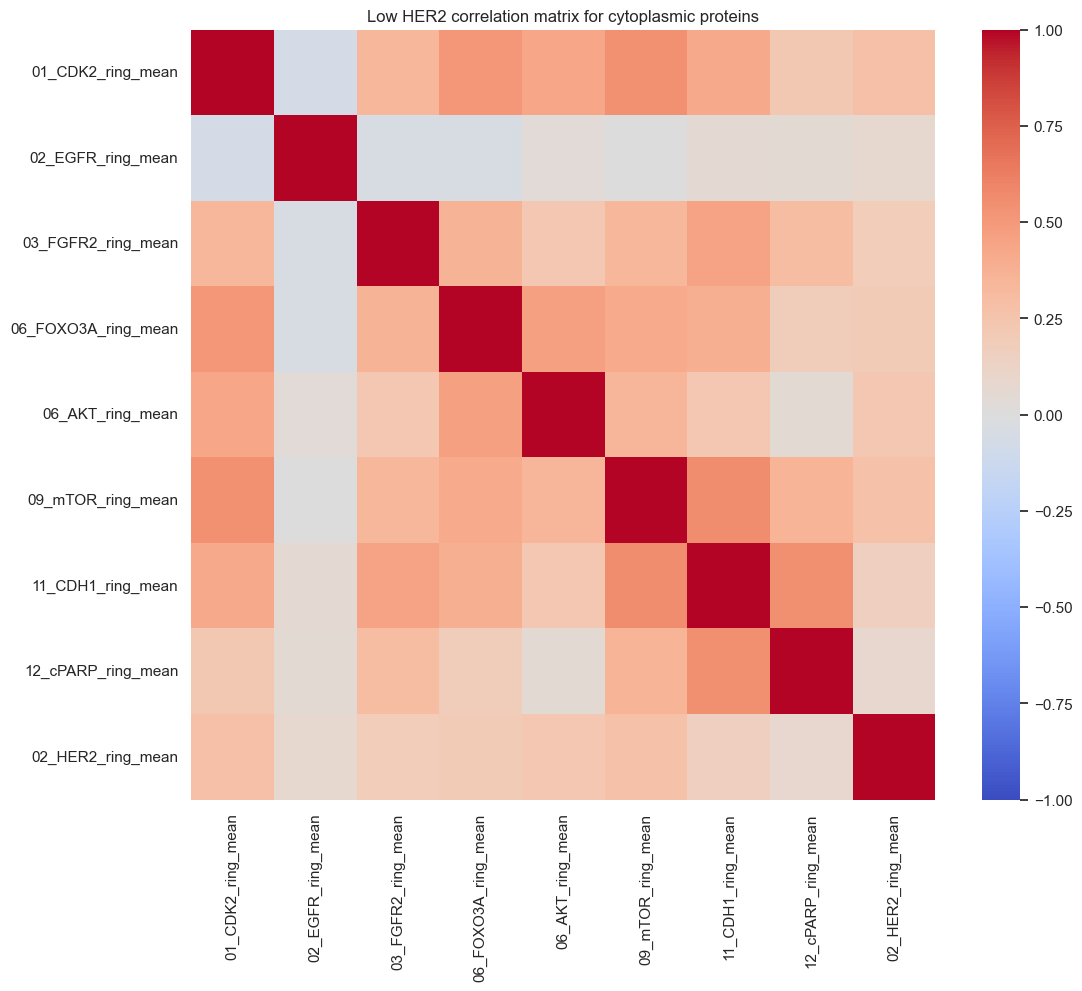

In [55]:
cyt_high_corr = cyt_high.corr(method= "pearson")

plt.figure(figsize=(12,10))
sns.heatmap(cyt_high_corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("High HER2 correlation matrix for cytoplasmic proteins")
plt.show()

cyt_low_corr = cyt_low.corr(method="pearson")
plt.figure(figsize=(12,10))
sns.heatmap(cyt_low_corr, cmap="coolwarm",vmin=-1, vmax=1)
plt.title("Low HER2 correlation matrix for cytoplasmic proteins")
plt.show()

In [ ]:
print(cyt_high_corr.loc())

                     01_CDK2_ring_mean  02_EGFR_ring_mean  03_FGFR2_ring_mean  \
01_CDK2_ring_mean             1.000000           0.244363            0.434768   
02_EGFR_ring_mean             0.244363           1.000000            0.063539   
03_FGFR2_ring_mean            0.434768           0.063539            1.000000   
06_FOXO3A_ring_mean           0.610602           0.211491            0.548638   
06_AKT_ring_mean              0.515383           0.277205            0.400030   
09_mTOR_ring_mean             0.659367           0.243931            0.462849   
11_CDH1_ring_mean             0.676768           0.203222            0.559828   
12_cPARP_ring_mean            0.510302           0.167463            0.416934   
02_HER2_ring_mean             0.003121           0.122721            0.082744   

                     06_FOXO3A_ring_mean  06_AKT_ring_mean  09_mTOR_ring_mean  \
01_CDK2_ring_mean               0.610602          0.515383           0.659367   
02_EGFR_ring_mean          